
# Project: Investigate a Dataset (No show up appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects informationfrom 100k medical appointments inBrazil and is focused on the questionof whether or not patients show upfor their appointment. A number ofcharacteristics about the patient areincluded in each row.●‘Scheduled Day’ tells us on what day the patient set up their appointment.●‘Neighborhood’ indicates thelocation of the hospital.●‘Scholarship’ indicateswhether or not the patient isenrolled in Brasilian welfare program Bolsa Família.●Be careful about the encoding of the last column: it says ‘No’ ifthe patient showed up to their appointment, and ‘Yes’ if they did not show up.

<li>Does people who have a scholarship not show up in their appointments?</li>
<li> Are no-show appointments associated with a certain gender?</li>
<li> Are chronic illnesses like hypertension and diabetes affecting patient's absences?</li>
<li> Is alcoholism a prominent factor in patient's absences? Are the absences frequent?</li>
<li> Do SMS reminders decrease the number of absences?</li>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

<li> Convert ScheduledDay and AppointmentDay from 'object' dtype to 'datetime64 </li>
<li> Removed AppointmenID as this information is not useful. </li>


### General Properties

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [14]:
df.drop('AppointmentID',axis='columns', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hipertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handcap         110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


### Data Cleaning 
<li> In this section I removed the negative values in the age column. </li>


In [16]:
df.describe(include='all')

/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/home/shrouk/anaconda3/envs/tesorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,2,111,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,2016-05-03 00:00:00,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,71840,4238,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,NaN,2015-11-10 00:00:00,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 00:00:00,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474963e+14,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [17]:
df.loc[df['Age'] < 0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
df.loc[df['Age'] < 0, 'Age'] = 0

In [19]:
df.loc[df['Age'] < 0] #now there is no -ve values in Age column.

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
df.isna().sum()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Plotting the histogram of all numerical features

In [32]:
#This function for counting the values in a specific column
def ValueCount(ColName):
    print (df[ColName].value_counts())

In [33]:
ValueCount('Scholarship')

0    99666
1    10861
Name: Scholarship, dtype: int64


In [34]:
ValueCount('Age')

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


In [35]:
ValueCount('SMS_received')

0    75045
1    35482
Name: SMS_received, dtype: int64


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>]],
      dtype=object)

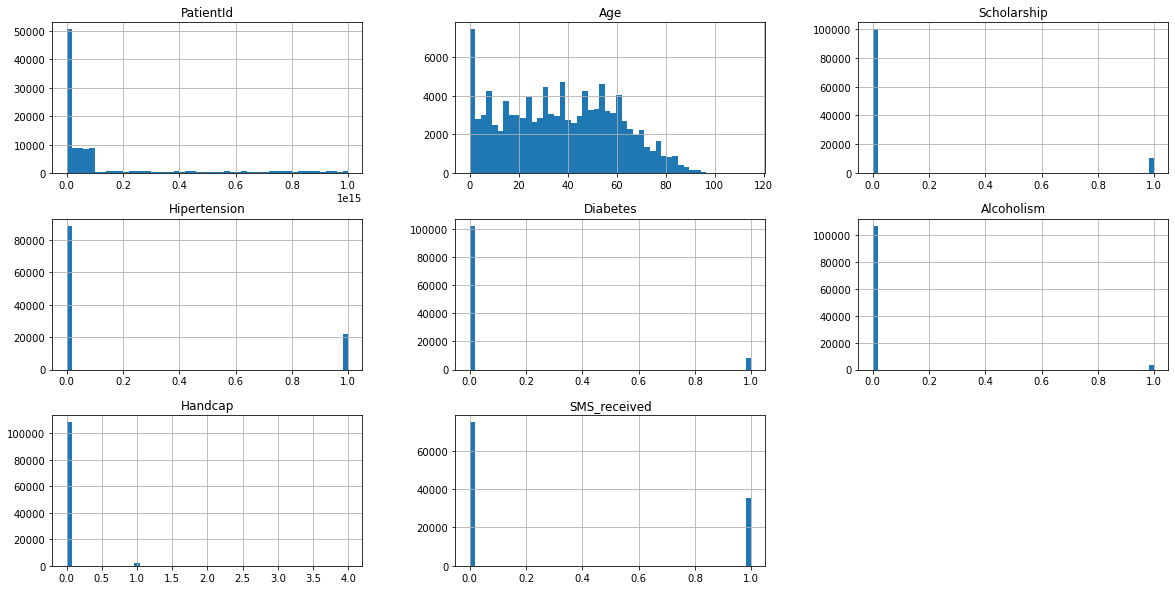

In [21]:
df.hist(figsize=(20,10),bins=50)

### Females visit doctors more than males.

Text(0, 0.5, 'Show-up')

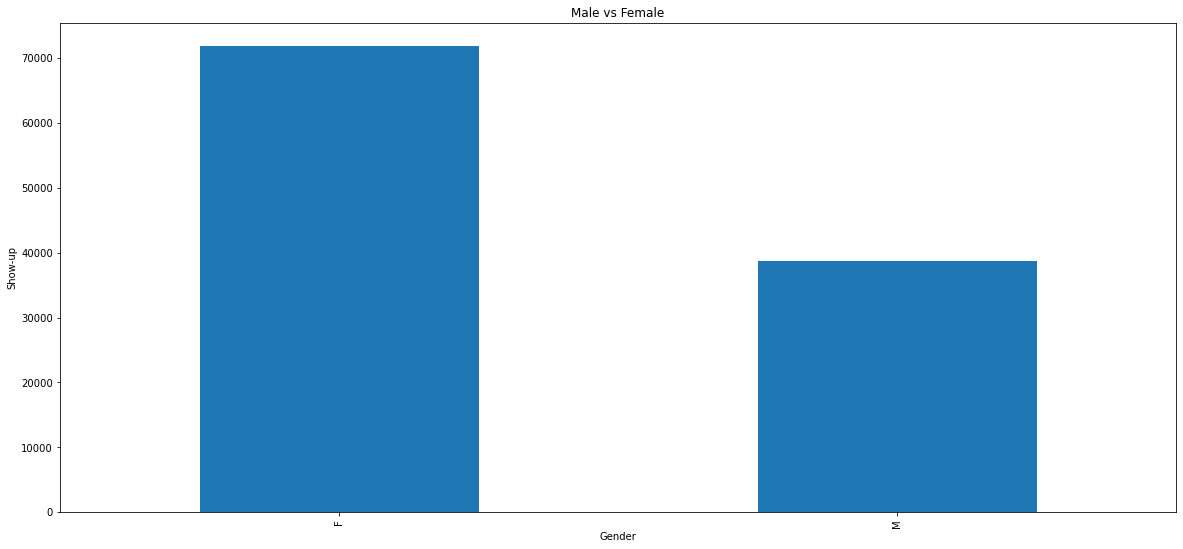

In [38]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(20,9))
df.groupby(['Gender'])['Gender'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Male vs Female')
plt.ylabel('Show-up')

## Females don't show up on their appointments any more than males.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

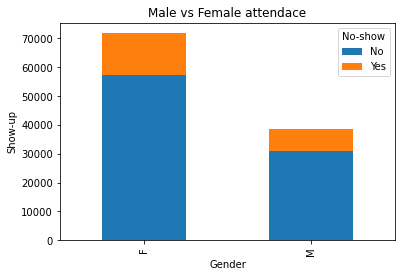

In [37]:
plt.figure(figsize=(20, 11))
df.groupby(['Gender', 'No-show'])['Gender'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Male vs Female attendace')
plt.ylabel('Show-up')

## From the below correlation heatmap it shows that the most correlated factors which are actually slightly correlated for not showing up is:
<li> Receiving an SMS! which is so weired! </li>
<li> having a handicap </li>

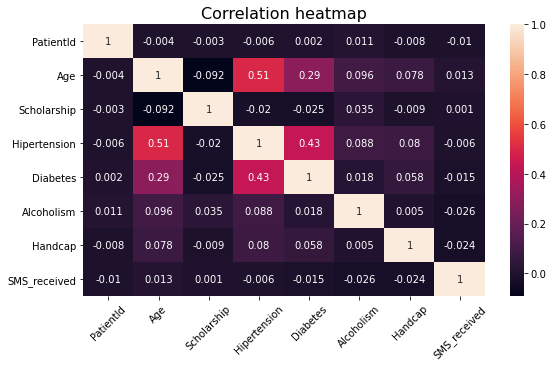

In [27]:
plt.figure(figsize=(9,5))
sns.heatmap(df.copy().corr().round(3), annot = True)
plt.title('Correlation heatmap', size='16')
plt.xticks(rotation='45');

# (Question 1) Does people who have a scholarship not show up in their appointments?
## Most of the people who have a scholarship show up in their appointments.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

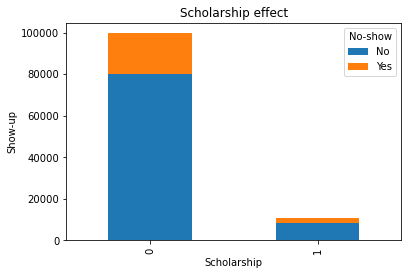

In [39]:
plt.figure(figsize=(20, 11))
df.groupby(['Scholarship', 'No-show'])['Scholarship'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Scholarship effect')
plt.ylabel('Show-up')

# (Question 2) Are chronic illnesses like hypertension and diabetes affecting patient's absences?
## Most of the people suffering from hipertension show up in their appointments.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

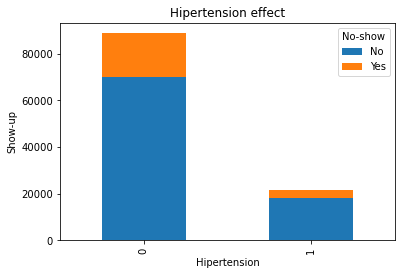

In [40]:
plt.figure(figsize=(20, 11))
df.groupby(['Hipertension', 'No-show'])['Hipertension'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Hipertension effect')
plt.ylabel('Show-up')

# (Question 3) Are chronic illnesses like hypertension and diabetes affecting patient's absences?
## Most of the people suf
## Most of the people suffering  from diabetes show up in their appointments.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

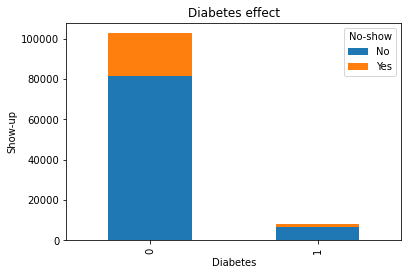

In [41]:
plt.figure(figsize=(20, 11))
df.groupby(['Diabetes', 'No-show'])['Diabetes'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Diabetes effect')
plt.ylabel('Show-up')

# (Question 4) Is alcoholism a prominent factor in patient's absences? Are the absences frequent?
## Most of the people suffering from alcoholism show up on their appointments.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

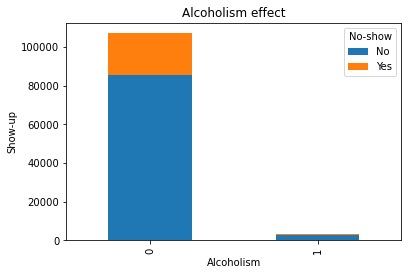

In [42]:
plt.figure(figsize=(20, 11))
df.groupby(['Alcoholism', 'No-show'])['Alcoholism'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Alcoholism effect')
plt.ylabel('Show-up')

# (Question 5) Does people who have handicap not show up in their appointments?
## All of the people that have handicap show up in their appointments.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

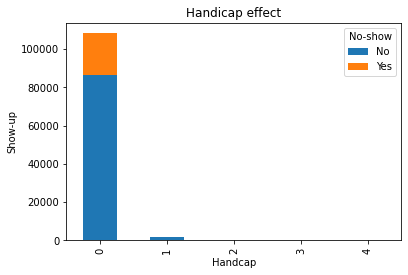

In [43]:
plt.figure(figsize=(20, 11))
df.groupby(['Handcap', 'No-show'])['Handcap'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Handicap effect')
plt.ylabel('Show-up')

# (Question 6) Do SMS reminders decrease the number of absences?
## People who recived an SMS committed to their appointments more than those who didn't recive.

Text(0, 0.5, 'Show-up')

<Figure size 1440x792 with 0 Axes>

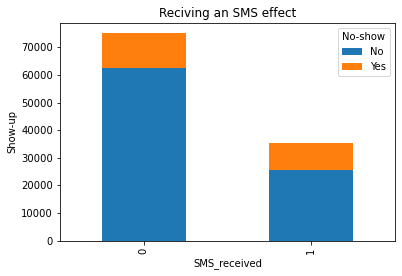

In [44]:
plt.figure(figsize=(20, 11))
df.groupby(['SMS_received', 'No-show'])['SMS_received'].count().unstack('No-show').plot(kind='bar', stacked=True)
plt.title('Reciving an SMS effect')
plt.ylabel('Show-up')

<a id='conclusions'></a>
## Conclusions
# Results
<li> People who recived an SMS committed to their appointments more than those who didn't recive.</li>
<li> All of the people that have handicap show up in their appointments.</li>
<li> Most of the people suffering from alcoholism show up on their appointments.</li>
<li> Most of the people suffering  from diabetes show up in their appointments.</li>
<li> Most of the people suffering from hipertension show up in their appointments.</li>
<li> Most of the people who have a scholarship show up in their appointments.</li>
<li> Females don't show up on their appointments any more than males.</li>

# Limitiations
<li> Can't show strong correlations between factors since most of the data is categorical. </li>